# 1. Gaussian Kernel

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm

In [37]:
def GaussianKernel(v1, v2, sigma):
    res = np.exp(-(norm(v1-v2)**2/(2*sigma**2)))
    
    return res

In [42]:
print np.power([2,3],2)
print np.sum([2,3])

val = GaussianKernel(np.array([0,0]), np.array([3,5]), 1.0)
print val

[4 9]
5
4.139937718785167e-08


In [39]:
d = 100
x1 = np.linspace(0, 6, d)
x2 = np.linspace(0, 10, d)
l1 = [3, 5]

Z = np.zeros((d,d))
sigma = 1.5

for i,t1 in enumerate(x1):
    for j,t2 in enumerate(x2):
        val = GaussianKernel(np.array([t1,t2]), l1, sigma)
        Z[i, j] = val

In [40]:
from mpl_toolkits import mplot3d

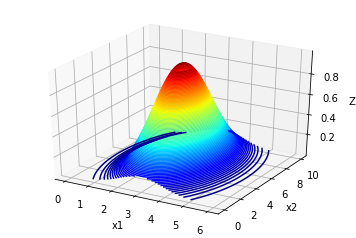

In [41]:
pX, pY = np.meshgrid(x1, x2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(pX, pY, Z, 100, cmap='jet')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Z')
plt.show()

# 2. 선형 SVM 분류

In [76]:
import numpy as np

from scipy.io import loadmat
data = loadmat('data1.mat')
print data

X=data['X']
y=data['y']
m=len(y)

{'y': array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8), 'X': array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182

In [77]:
print X.shape, y.shape

(51, 2) (51, 1)


In [78]:
pos = []
neg = []

for (i, val) in enumerate(y):
    if val==1:
        pos.append(i)
    else:
        neg.append(i)

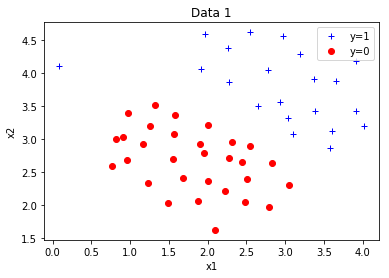

In [79]:
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='y=0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.title('Data 1')
plt.show()

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [81]:
svm_clf = Pipeline([
    ("scalar", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [82]:
svm_clf.predict([[2.3,2.7],
                [3.7,3.9]])

array([0, 1], dtype=uint8)

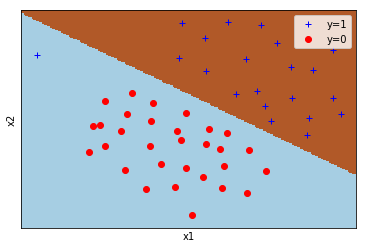

In [83]:
x_min, x_max = X[:,0].min()-0.2, X[:,0].max()+0.2
y_min, y_max = X[:,1].min()-0.2, X[:,1].max()+0.2
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h ))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='y=0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# 3. 비선형 SVM 분류

In [84]:
import numpy as np

from scipy.io import loadmat
data = loadmat('data2.mat')
print data

X=data['X']
y=data['y']
m=len(y)

{'y': array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]

In [85]:
print X.shape, y.shape

(863, 2) (863, 1)


In [86]:
pos = []
neg = []

for (i, val) in enumerate(y):
    if val==1:
        pos.append(i)
    else:
        neg.append(i)

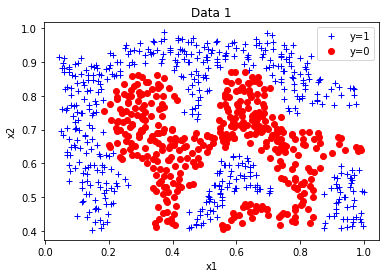

In [87]:
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='y=0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.title('Data 1')
plt.show()

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf = Pipeline([
    ("scalar", StandardScaler()),
    ("linear_svc", SVC(kernel="rbf", C=1, gamma=10))
])

svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [89]:
svm_clf.predict([[2.3,2.7],
                [3.7,3.9]])

array([1, 1], dtype=uint8)

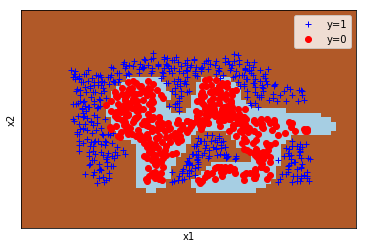

In [90]:
x_min, x_max = X[:,0].min()-0.2, X[:,0].max()+0.2
y_min, y_max = X[:,1].min()-0.2, X[:,1].max()+0.2
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h ))
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label='y=1')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='y=0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()